# Introduction

L'investissement financier est une discipline complexe qui exige une approche stratégique pour maximiser les rendements tout en minimisant les risques. La Modern Portfolio Theory (MPT), introduite par Harry Markowitz dans les années 1950, a révolutionné la façon dont les investisseurs abordent la construction de leurs portefeuilles. Au cœur de la MPT se trouve le concept d'Efficient Frontier, une frontière théorique qui représente le meilleur compromis entre le rendement attendu et le risque pour un ensemble donné d'actifs financiers.

Ce projet vise à explorer en profondeur l'Efficient Frontier et à comprendre comment elle peut être utilisée pour guider la prise de décision en matière d'investissement. Nous allons plonger dans les principes fondamentaux de la MPT, examiner comment la diversification peut influencer la composition optimale d'un portefeuille, et analyser comment les gestionnaires de portefeuille peuvent utiliser cette approche pour atteindre des objectifs spécifiques en matière de rendement et de risque.

À travers cette exploration, nous aborderons également les défis et les critiques associés à la MPT, ainsi que les développements récents qui ont élargi et amélioré cette théorie. En fin de compte, notre objectif est de fournir une compréhension approfondie de l'Efficient Frontier dans le contexte de la MPT et d'offrir des perspectives pratiques pour les investisseurs cherchant à optimiser leurs portefeuilles dans un environnement financier dynamique.

# Théorie moderne du portefeuille

La théorie moderne du portefeuille (MPT) est une théorie d'investissement développée par Harry Markowitz et publiée sous le titre « Portfolio Selection » dans le Journal of Finance en 1952.

Il existe quelques concepts sous-jacents qui peuvent aider quiconque à comprendre MPT. Si vous êtes familier avec la finance, vous savez peut-être ce que signifie l'acronyme « TANSTAAFL ». C’est un acronyme célèbre pour « There Ain’t No Such Thing As A Free Lunch ». Ce concept est également étroitement lié au « compromis risque-rendement ».

Un risque plus élevé est associé à une plus grande probabilité d’un rendement plus élevé et un risque plus faible à une plus grande probabilité d’un rendement plus faible. MPT suppose que les investisseurs sont réfractaires au risque, ce qui signifie que, étant donné deux portefeuilles offrant le même rendement attendu, les investisseurs préféreront le moins risqué. Ainsi, un investisseur n’acceptera un risque accru que s’il est compensé par des rendements attendus plus élevés.

Un autre facteur qui entre en jeu dans le MPT est la « diversification ». La théorie moderne du portefeuille affirme qu’il ne suffit pas d’examiner le risque et le rendement attendus d’une action particulière. En investissant dans plus d’une action, un investisseur peut profiter des avantages de la diversification, dont le principal est une réduction du risque du portefeuille.

Ce que vous devez comprendre, c'est que « le risque d'un portefeuille n'est pas égal à la moyenne/moyenne pondérée des actions individuelles du portefeuille ». En termes de rendement, oui, il s'agit de la moyenne pondérée des rendements d'actions individuelles, mais ce n'est pas le cas pour le risque. Le risque réside dans la volatilité de l'actif. Si vous avez plus d'une action dans votre portefeuille, vous devez alors tenir compte de la façon dont les mouvements de ces actions sont corrélés les uns aux autres. La beauté de la diversification est que vous pouvez même obtenir un risque inférieur à celui d’une action présentant le risque le plus faible de votre portefeuille, en optimisant l’allocation.


In [1]:


import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'




Pour exécuter le bloc de code ci-dessous, vous aurez besoin de votre propre clé API. Les valeurs sélectionnées pour cet article sont Apple, Amazon, Google, Facebook. Le bloc de code ci-dessous obtiendra le cours de clôture ajusté quotidiennement de chaque action du 01/01/2016 au 31/12/2017. 

In [3]:


quandl.ApiConfig.api_key = 'cQDr6U3fGf6f1Bx4QQ1s'
stocks = ['AAPL','AMZN','GOOGL','FB']
data = quandl.get_table('WIKI/PRICES', ticker = stocks,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2017-12-31' }, paginate=True)
data



,date,ticker,adj_close
None,,,
0,2017-12-29,GOOGL,1053.400000
1,2017-12-28,GOOGL,1055.950000
2,2017-12-27,GOOGL,1060.200000
3,2017-12-26,GOOGL,1065.850000
4,2017-12-22,GOOGL,1068.860000
...,...,...,...
2001,2016-01-08,AAPL,93.677776
2002,2016-01-07,AAPL,93.185040
2003,2016-01-06,AAPL,97.291172



En regardant l'info() des données, il semble que la colonne "date" soit déjà au format datetime. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2006 non-null   datetime64[ns]
 1   ticker     2006 non-null   object        
 2   adj_close  2006 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 47.1+ KB


In [5]:


df = data.set_index('date')
df.head()



,ticker,adj_close
date,,
2017-12-29,GOOGL,1053.40
2017-12-28,GOOGL,1055.95
2017-12-27,GOOGL,1060.20
2017-12-26,GOOGL,1065.85
2017-12-22,GOOGL,1068.86


Examinons d'abord comment le prix de chaque action a évolué au cours d'une période donnée

In [6]:


table = df.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()



,AAPL,AMZN,FB,GOOGL
date,,,,
2016-01-04,101.783763,636.99,102.22,759.44
2016-01-05,99.233131,633.79,102.73,761.53
2016-01-06,97.291172,632.65,102.97,759.33
2016-01-07,93.185040,607.94,97.92,741.00
2016-01-08,93.677776,607.05,97.33,730.91


Text(0, 0.5, 'price in $')

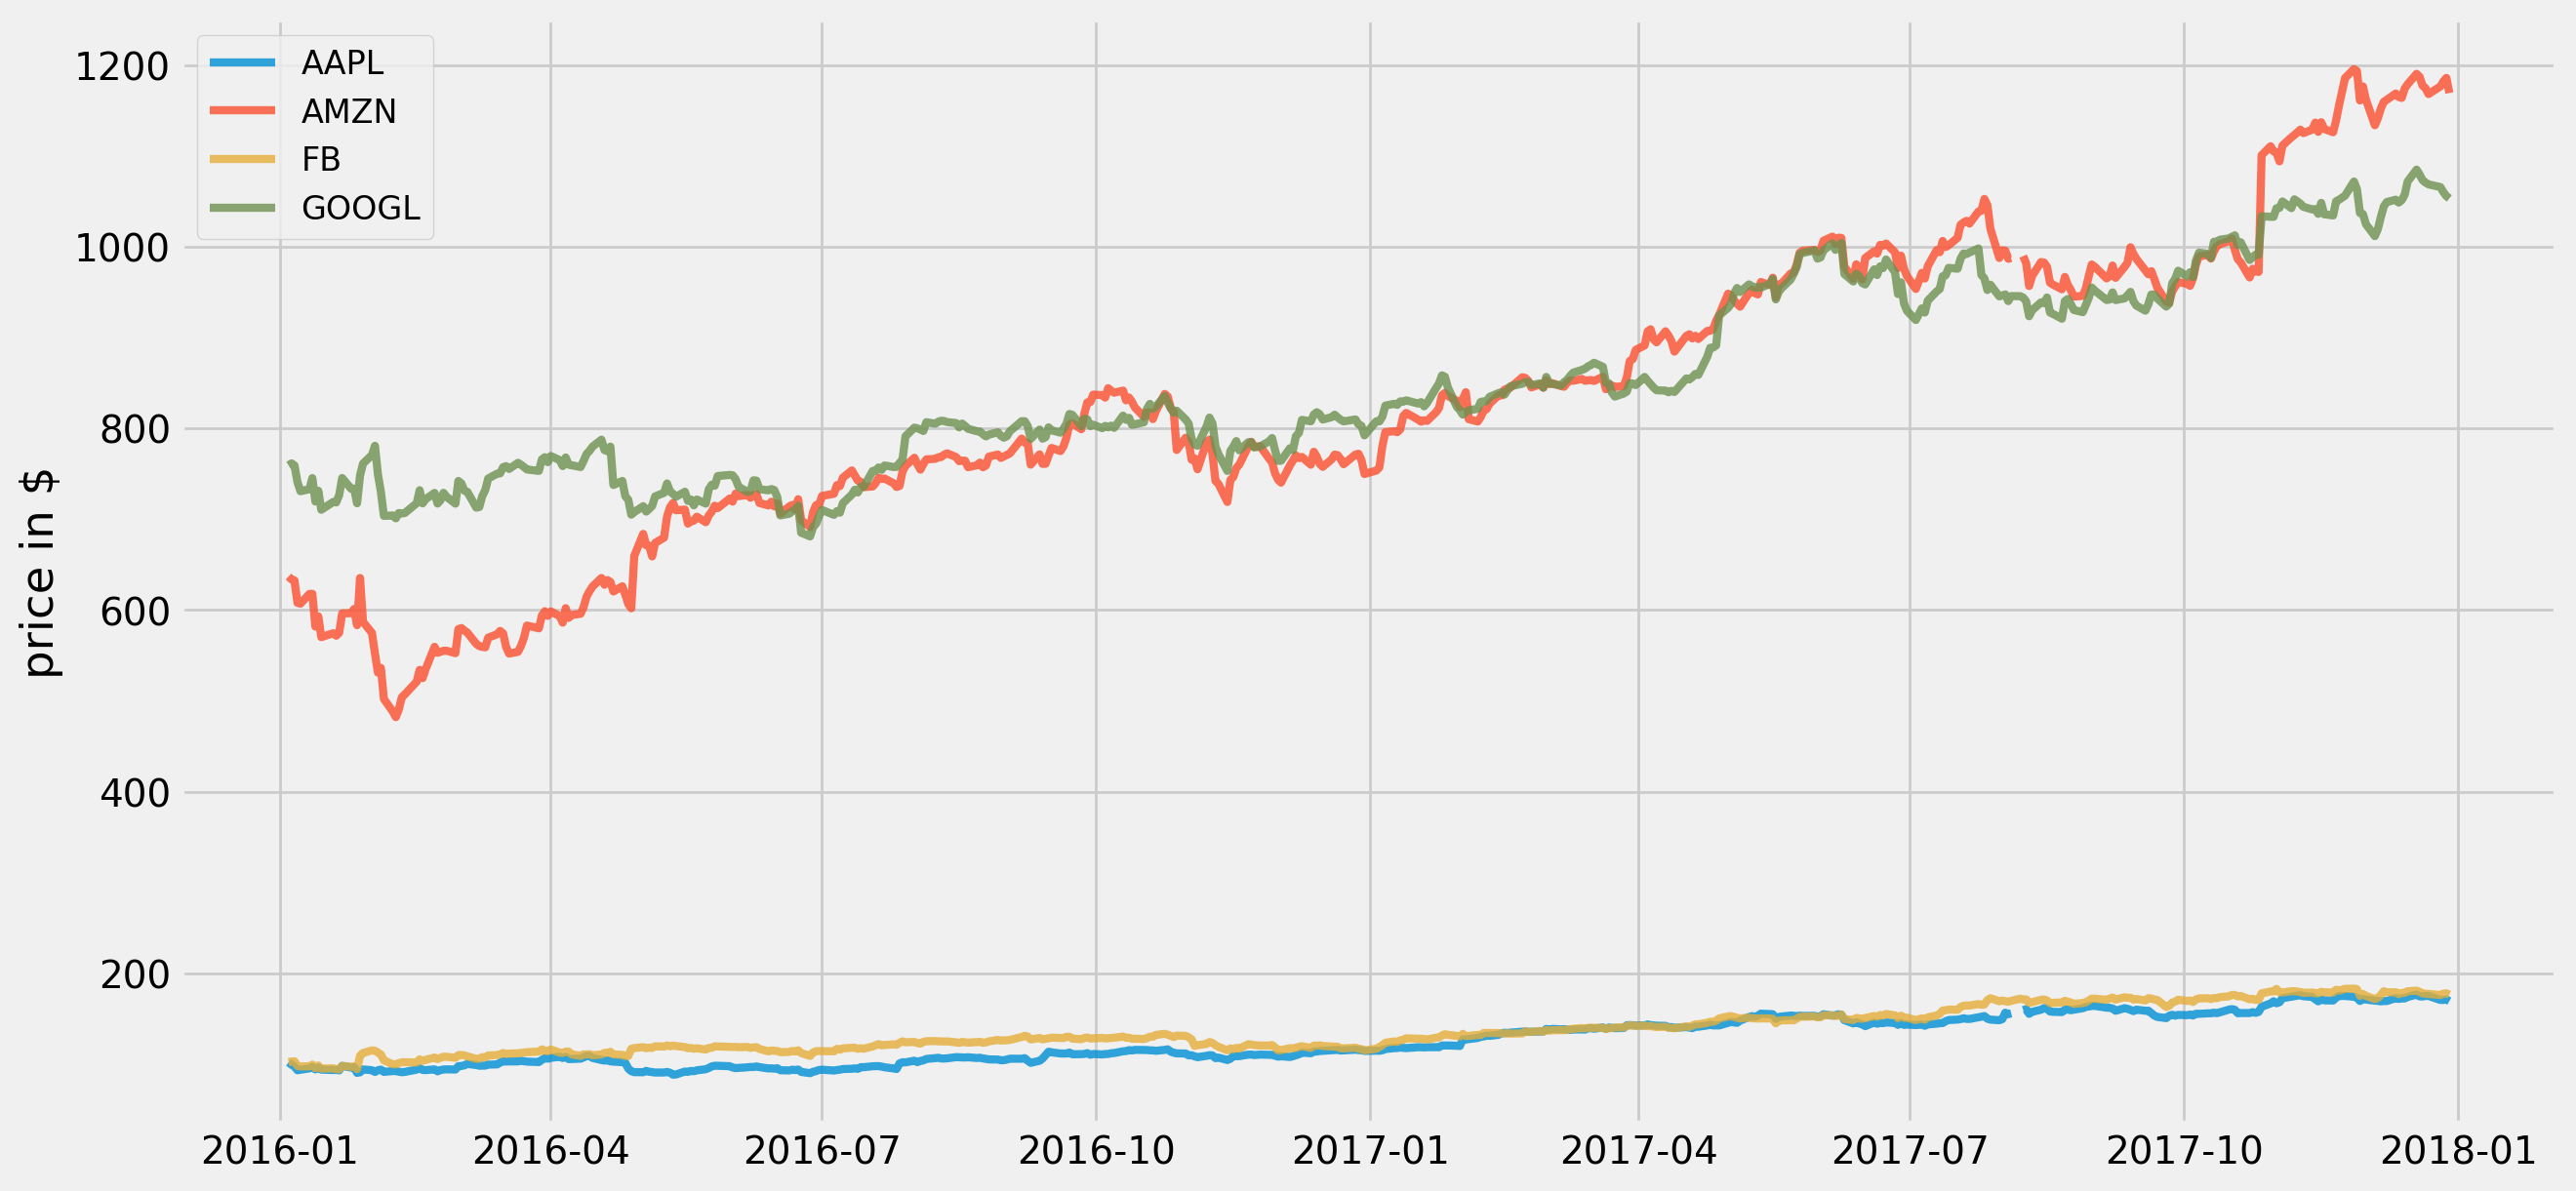

In [7]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')



Il semble que le cours des actions d'Amazon et de Google soit relativement plus cher que celui de Facebook et d'Apple. Mais comme Facebook et Apple sont écrasés au fond, il est difficile de voir le mouvement de ces deux-là.

Une autre façon de tracer cela consiste à tracer les rendements quotidiens (pourcentage de variation par rapport à la veille). En traçant les rendements quotidiens plutôt que les prix réels, nous pouvons voir la volatilité des actions.


C:\Users\dell\AppData\Local\Temp\ipykernel_27392\3389493915.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = table.pct_change()


Text(0, 0.5, 'daily returns')

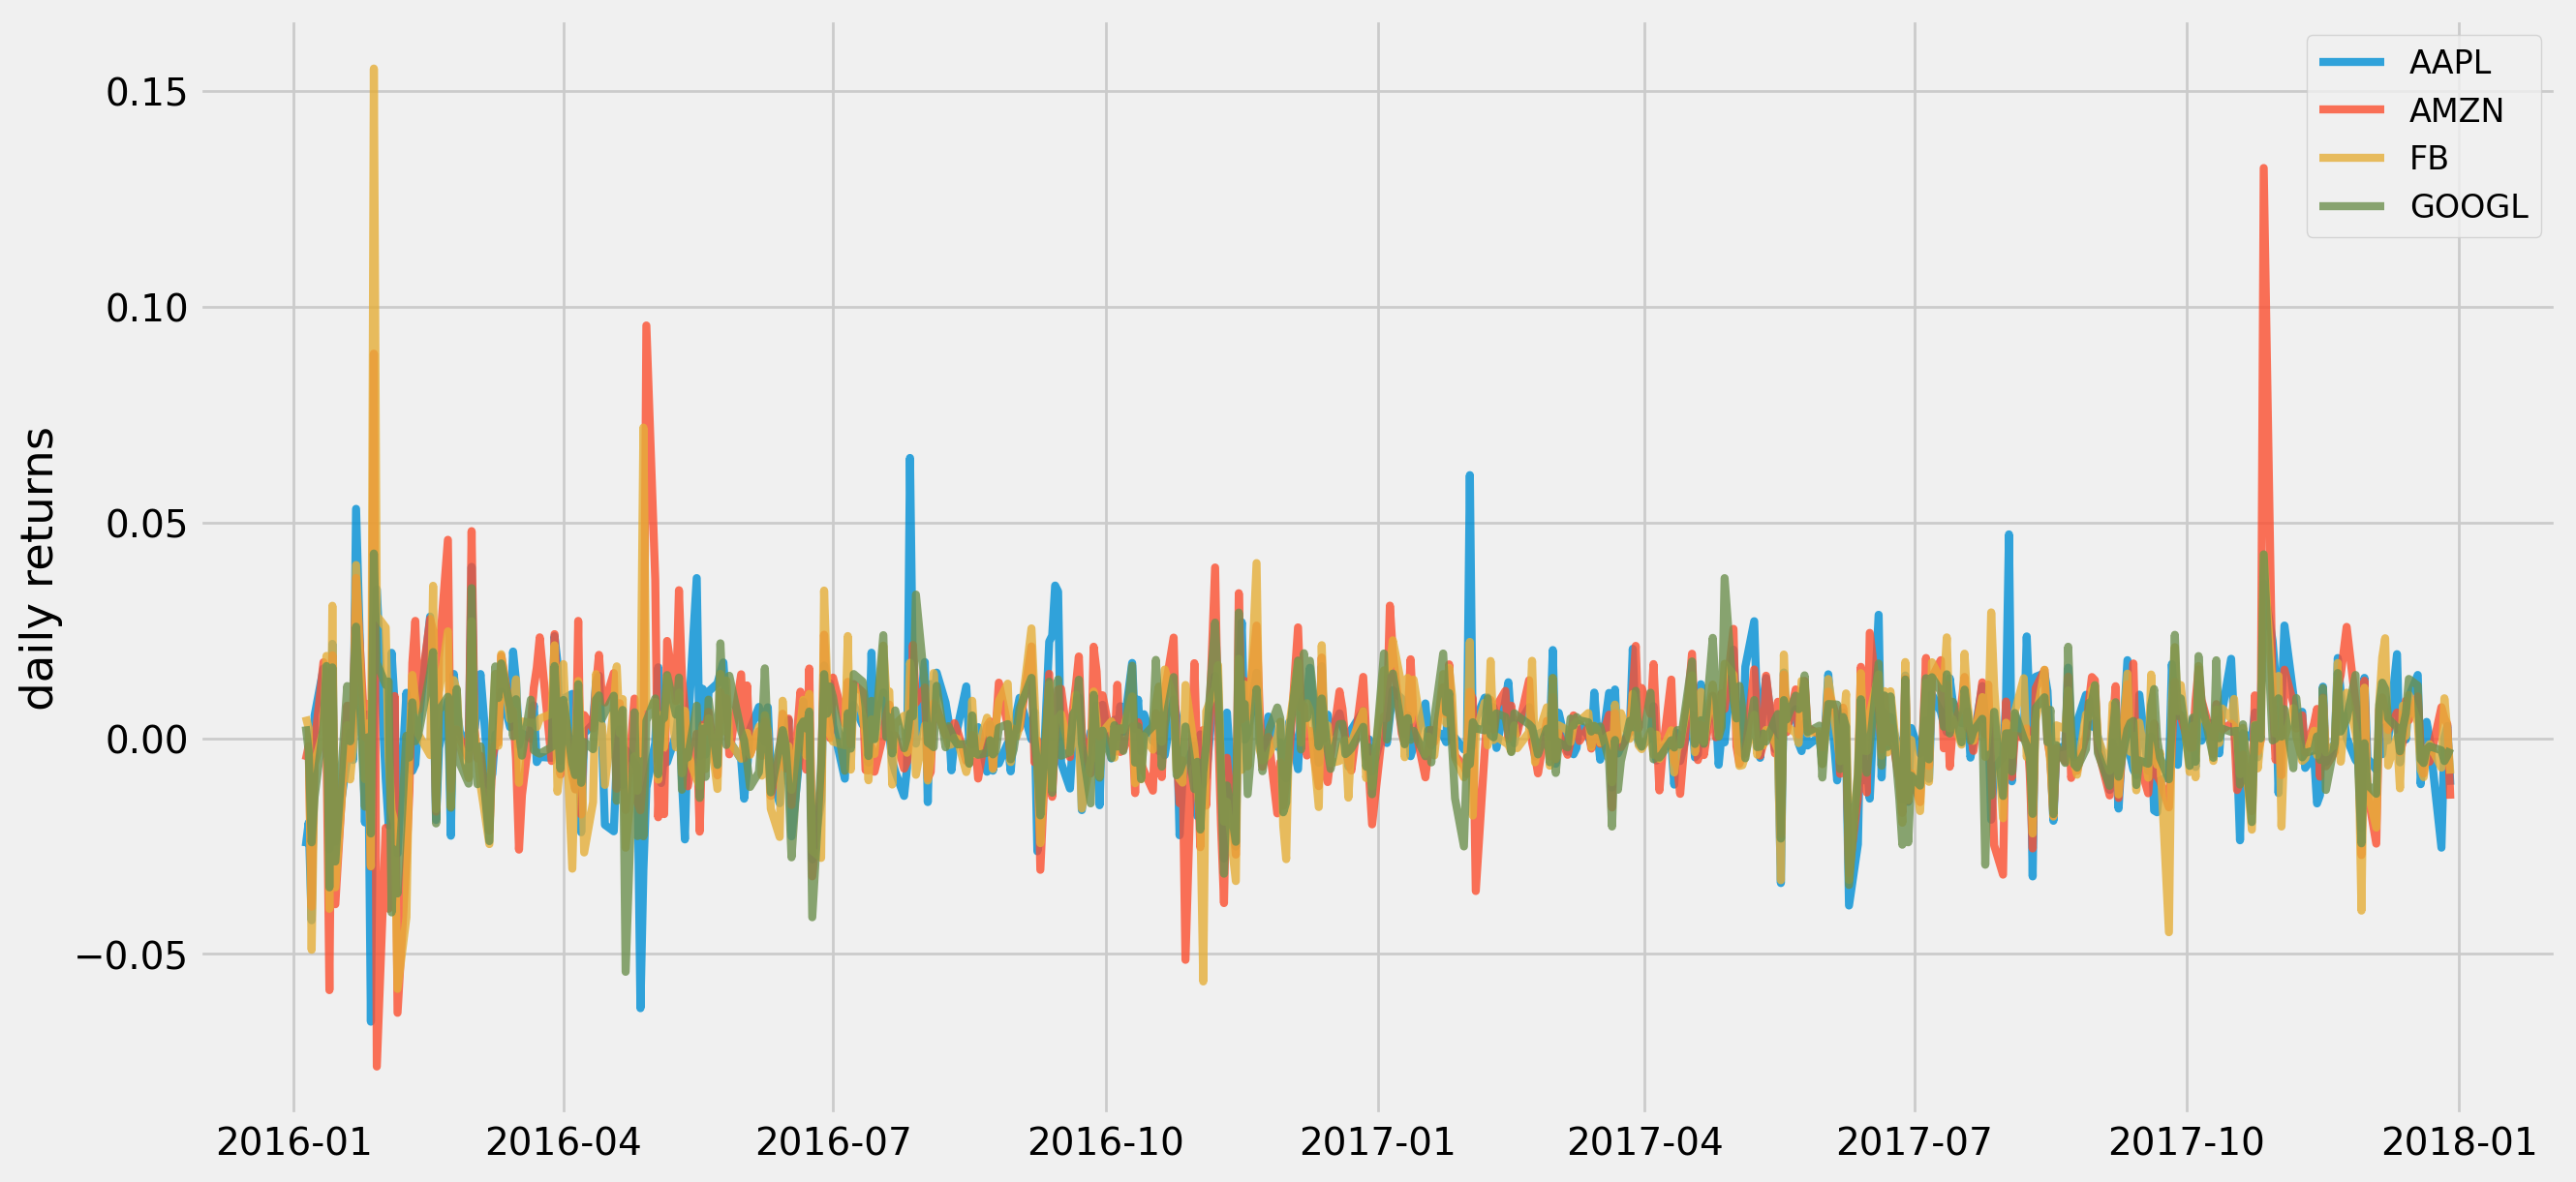

In [8]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')



Amazon présente deux pics positifs distinctifs et quelques pics négatifs. Facebook a un pic positif le plus élevé. Et Google semble être le moins volatile.
$$
Génération de portefeuilles aléatoires
$$

Nous avons 4 valeurs dans notre portefeuille. Une décision que nous devons prendre est de savoir comment allouer notre budget à chacune des actions de notre portefeuille. Si notre budget total est de 1, nous pouvons alors décider des pondérations pour chaque stock, de sorte que la somme des pondérations soit de 1. Et la valeur des pondérations sera la partie du budget que nous allouons à un stock spécifique. Par exemple, si le poids est de 0,5 pour Amazon, cela signifie que nous allouons 50 % de notre budget à Amazon.

Définissons quelques fonctions pour simuler des pondérations aléatoires pour chaque action du portefeuille, puis calculons les rendements annualisés globaux et la volatilité annualisée du portefeuille.

La fonction "portfolio_annual_performance" calculera les rendements et la volatilité, et pour en faire un calcul annualisé, je prends en compte 252 comme nombre de jours de bourse dans une année. La fonction "random_portfolios" générera des portefeuilles avec des pondérations aléatoires attribuées à chaque action, et en passant l'argument num_portfolios, vous pourrez décider du nombre de portefeuilles aléatoires que vous souhaitez générer.


In [9]:


def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns



In [15]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record



Vous pouvez facilement obtenir des rendements quotidiens en appelant pct_change sur la trame de données contenant les données de prix. Et les rendements quotidiens moyens, la matrice de covariance des rendements sont nécessaires pour calculer les rendements et la volatilité du portefeuille. Enfin, générons 25 000 portefeuilles avec des pondérations aléatoires attribuées à chaque action.


In [16]:


returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178



C:\Users\dell\AppData\Local\Temp\ipykernel_27392\908942029.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = table.pct_change()




Permettez-moi d'expliquer brièvement ce que fait la fonction ci-dessous. Premièrement, il génère un portefeuille aléatoire et obtient les résultats (rendements du portefeuille, volatilité du portefeuille, ratio de Sharpe du portefeuille) et les pondérations du résultat correspondant. Ensuite, en localisant celui avec le portefeuille de ratio de Sharpe le plus élevé, il affiche le portefeuille de ratio de Sharpe maximum sous forme de signe étoile rouge. Et effectue des étapes similaires pour le portefeuille à volatilité minimale et l'affiche sous la forme d'une étoile verte sur le tracé. Tous les portefeuilles générés aléatoirement seront également tracés avec une carte de couleurs qui leur sera appliquée en fonction du ratio Sharpe. Plus le rapport de Sharpe est bleu, plus il est élevé.

Et pour ces deux portefeuilles optimaux, il montrera également comment il répartit le budget au sein du portefeuille.


In [17]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.18


             AAPL   AMZN     FB  GOOGL
allocation  43.93  29.49  26.51   0.07
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.16


             AAPL  AMZN    FB  GOOGL
allocation  34.12  0.04  8.25  57.59


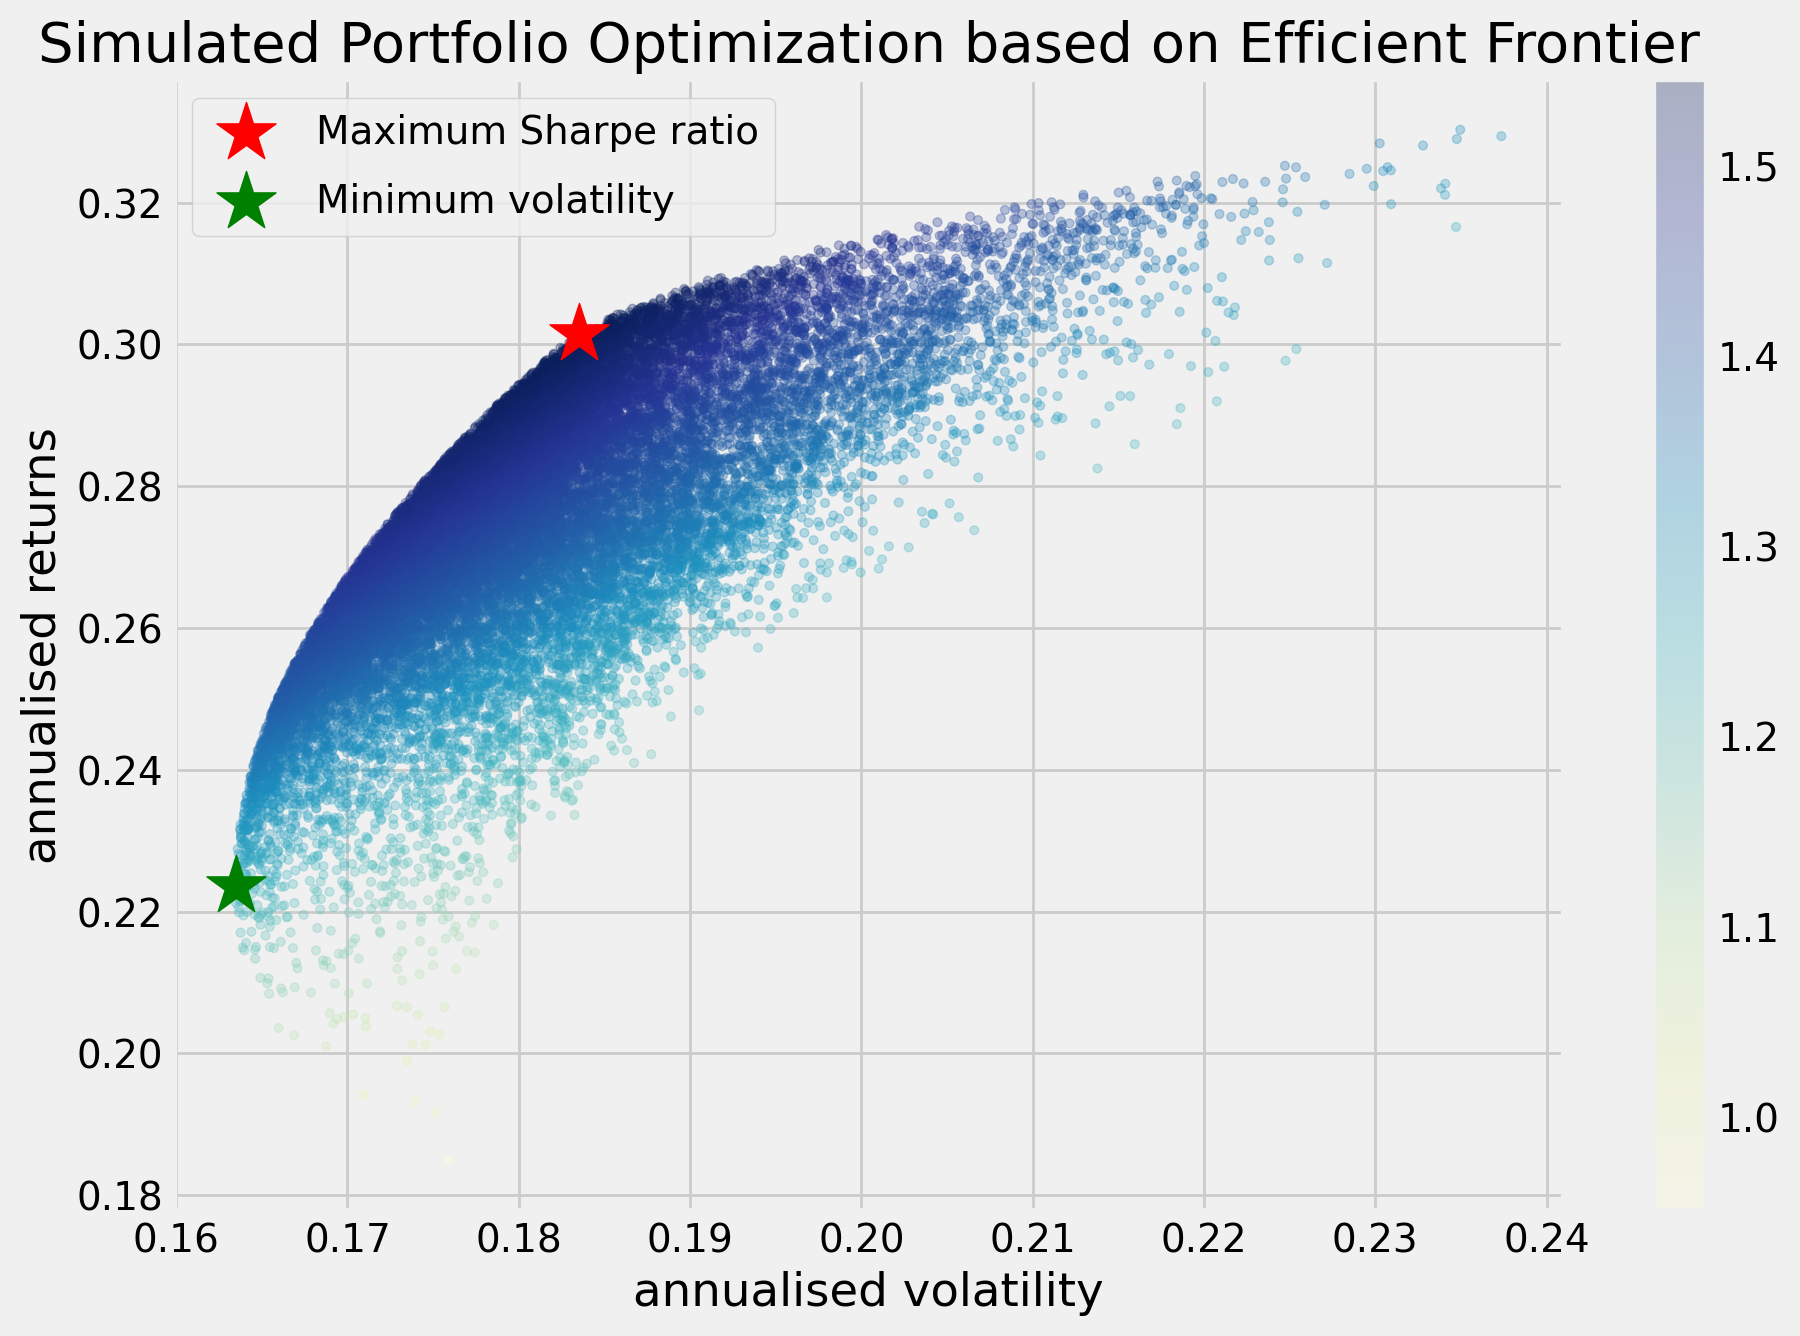

In [18]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)



Pour un portefeuille à risque minimum, on constate que plus de la moitié de notre budget est alloué à Google. Si vous regardez à nouveau le graphique des rendements quotidiens de plus tôt, vous pouvez voir que Google est l'action la moins volatile parmi quatre, il est donc intuitif d'attribuer un pourcentage élevé à Google pour un portefeuille à risque minimum.

Si nous sommes prêts à prendre un risque plus élevé pour obtenir un rendement plus élevé, celui qui nous donne le meilleur rendement ajusté au risque est celui avec le ratio de Sharpe maximum. Dans ce scénario, nous allouons une part importante à Amazon et Facebook, qui sont des actions assez volatiles par rapport au graphique précédent des rendements quotidiens. Et Google, qui disposait de plus de 50 % d’allocation dans le portefeuille à risque minimum, dispose de moins de 1 % de budget qui lui est alloué.
# Frontière efficace

À partir du tracé du portefeuille simulé de manière aléatoire, nous pouvons voir qu’il forme une forme d’arc au sommet de points bleus regroupés. Cette ligne est appelée frontière efficace. Pourquoi est-ce efficace ? Parce que les points le long de la ligne vous donneront le risque le plus faible pour un rendement cible donné. Tous les autres points jusqu’à la ligne vous donneront un risque plus élevé avec les mêmes rendements. Si les rendements attendus sont les mêmes, pourquoi prendriez-vous un risque supplémentaire alors qu’il existe une option avec un risque plus faible ?

La façon dont nous avons trouvé les deux types de portefeuille optimal ci-dessus consistait à simuler de nombreux choix aléatoires possibles et à sélectionner les meilleurs (soit un risque minimum, soit un rendement maximum ajusté au risque). Nous pouvons également implémenter cela en utilisant la fonction d'optimisation de Scipy.

Si vous êtes un utilisateur avancé d’Excel, vous connaissez peut-être la fonction « solveur » d’Excel. La fonction d'optimisation de Scipy effectue la même tâche lorsqu'on lui donne ce qu'il faut optimiser, quelles sont les contraintes et les limites.

Les fonctions ci-dessous permettent d'obtenir le portefeuille maximal de ratio Sharpe. Dans la fonction d'optimisation de Scipy, il n'y a pas de « maximiser », donc en tant que fonction objective, vous devez transmettre quelque chose qui doit être minimisé. C'est pourquoi le premier "neg_sharpe_ratio" calcule le rapport de Sharpe négatif. Nous pouvons maintenant l'utiliser comme fonction objectif pour minimiser. Dans la fonction "max_sharpe_ratio", vous définissez d'abord les arguments (cela ne doit pas inclure les variables que vous souhaitez modifier pour l'optimisation, dans ce cas, les "poids"). Au début, la construction des contraintes m'était un peu difficile à comprendre, à cause de la façon dont elle est énoncée.

contraintes = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})

La contrainte ci-dessus dit que la somme de x doit être égale à 1. Vous pouvez considérer la construction de la partie « amusante » comme si le « 1 » du côté droit du signe égal a été déplacé vers le côté gauche du signe égal.

'np.sum(x) == 1' est devenu 'np.sum(x)-1'

Et qu’est-ce que cela signifie ? Cela signifie simplement que la somme de tous les poids doit être égale à 1. Vous ne pouvez pas allouer plus de 100 % de votre budget au total.

"limites" donne une autre limite pour attribuer des poids aléatoires, en disant que tout poids doit être compris entre 0 et 1. Vous ne pouvez pas attribuer une allocation budgétaire négative à un stock ou une allocation supérieure à 100 % à un stock.


In [19]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result



Nous pouvons également définir la fonction d'optimisation pour calculer le portefeuille à volatilité minimale. Cette fois, nous minimisons vraiment la fonction objectif. Que veut-on minimiser ? Nous souhaitons minimiser la volatilité en essayant différentes pondérations. Les « contraintes » et les « limites » sont les mêmes que ci-dessus.


In [20]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

Comme je l'ai déjà mentionné ci-dessus, nous pouvons également tracer une ligne qui représente où devraient se trouver les portefeuilles efficaces pour un taux de risque donné. C'est ce qu'on appelle la « frontière efficace ». Ci-dessous, je définis d'autres fonctions pour calculer la frontière efficace. La première fonction « efficient_return » calcule le portefeuille le plus efficace pour un rendement cible donné, et la deuxième fonction « efficient_frontier » prendra une plage de rendements cibles et calculera un portefeuille efficace pour chaque niveau de rendement. 

In [21]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [23]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.18


             AAPL   AMZN     FB  GOOGL
allocation  44.67  29.05  26.28    0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.16


             AAPL  AMZN    FB  GOOGL
allocation  34.02  0.73  6.98  58.26


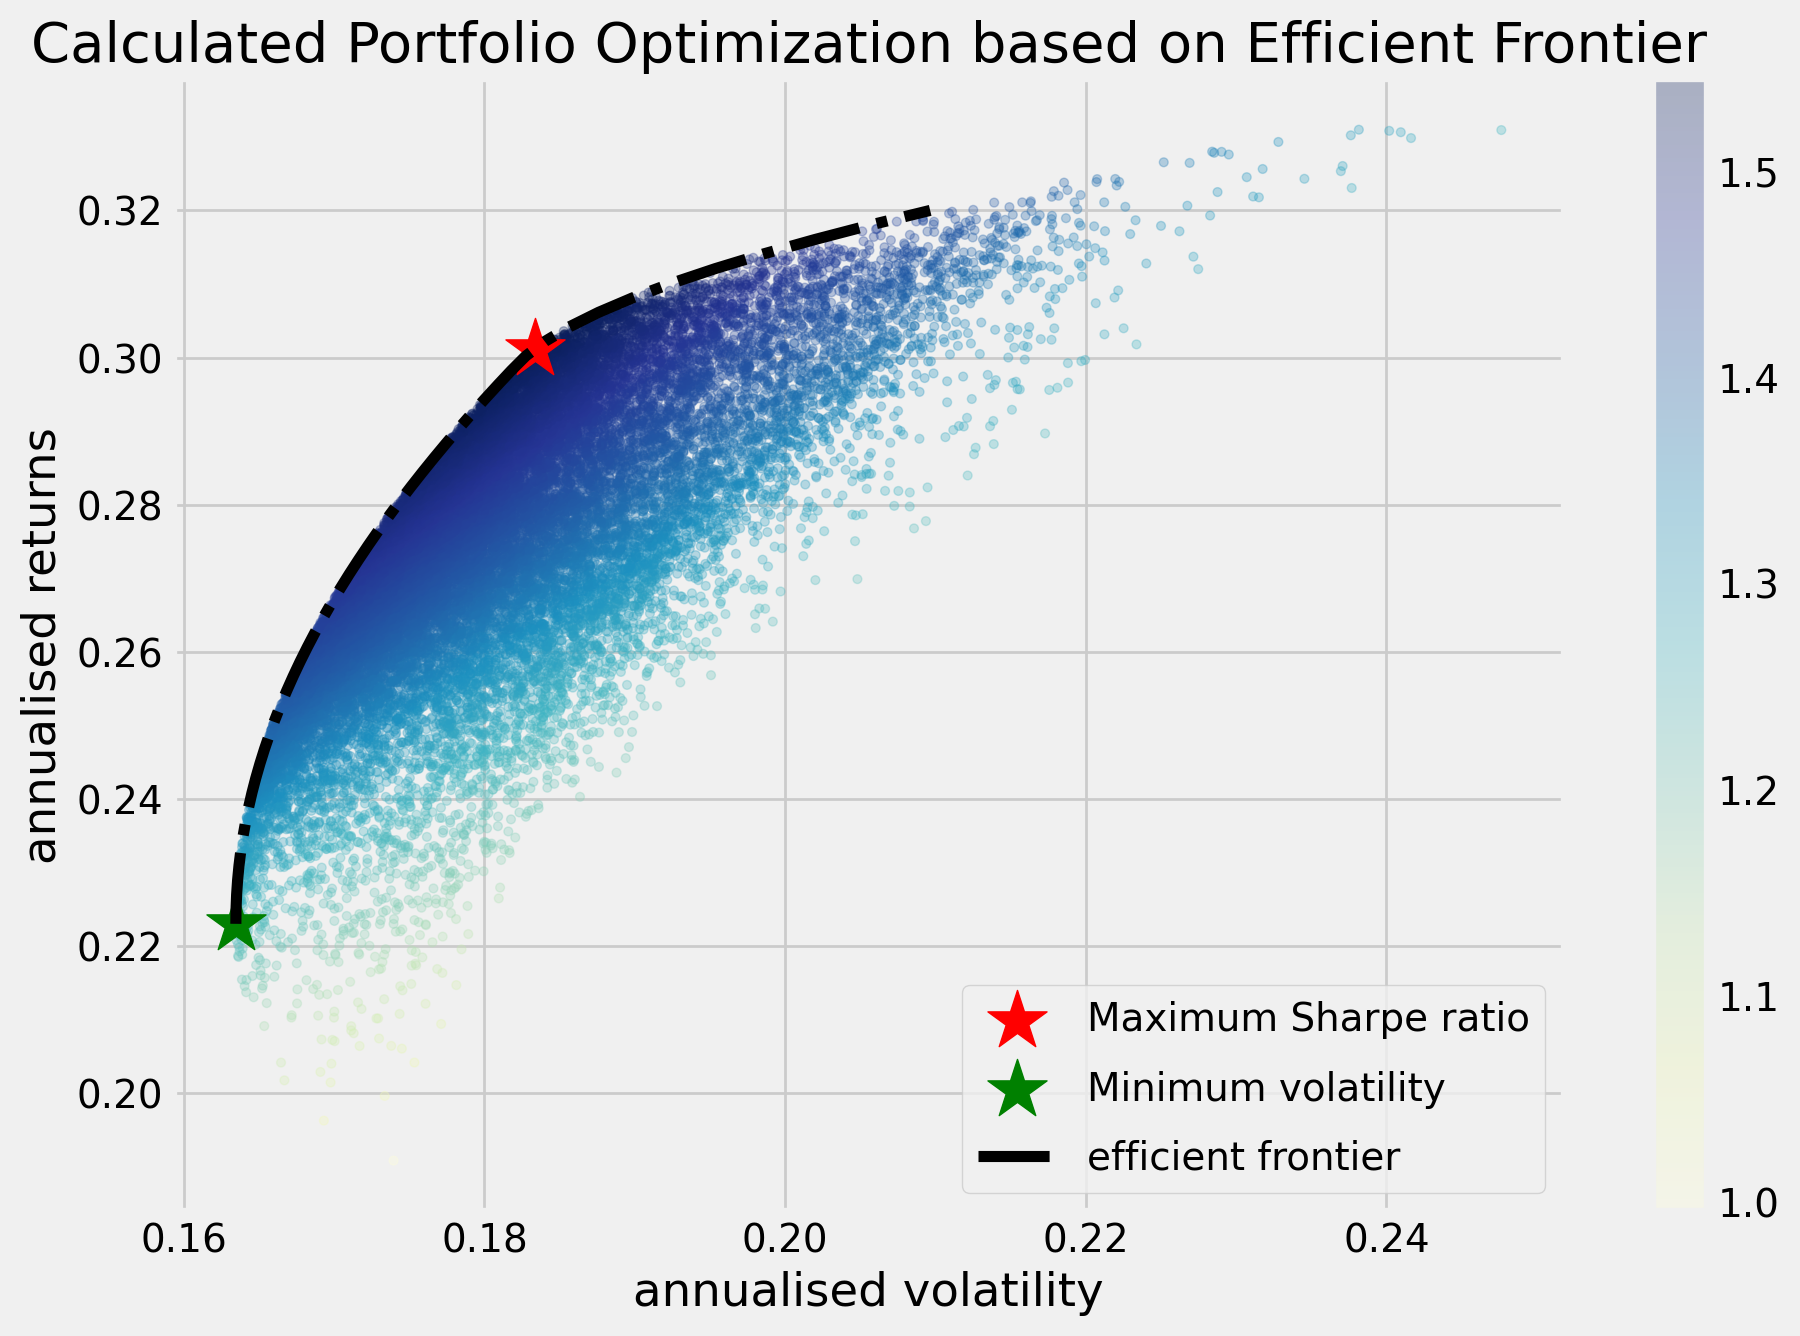

In [24]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)



Nous obtenons presque le même résultat que celui que nous avons simulé en piochant parmi les portefeuilles générés aléatoirement. La légère différence est que la fonction « optimiser » de Scipy n'a alloué aucun budget à Google sur le portefeuille de ratio de Sharpe maximum, alors que celle que nous avons choisie parmi les échantillons générés aléatoirement a 0,45 % d'allocation pour Google. Il y a quelques différences au niveau des décimales mais plus ou moins les mêmes.

Au lieu de tracer chaque portefeuille généré aléatoirement, nous pouvons tracer chaque action individuelle sur le graphique avec les valeurs correspondantes du rendement annuel et du risque annuel de chaque action. De cette façon, nous pouvons voir et comparer comment la diversification réduit le risque en optimisant l’allocation.


In [27]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\dell\AppData\Local\Temp\ipykernel_27392\2314151057.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
C:\Users\dell\AppData\Local\Temp\ipykernel_27392\2314151057.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.3
Annualised Volatility: 0.18


             AAPL   AMZN     FB  GOOGL
allocation  44.67  29.05  26.28    0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.16


             AAPL  AMZN    FB  GOOGL
allocation  34.02  0.73  6.98  58.26
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AAPL : annuaised return 0.28 , annualised volatility: 0.21
AMZN : annuaised return 0.34 , annualised volatility: 0.25
FB : annuaised return 0.3 , annualised volatility: 0.23
GOOGL : annuaised return 0.18 , annualised volatility: 0.18
--------------------------------------------------------------------------------


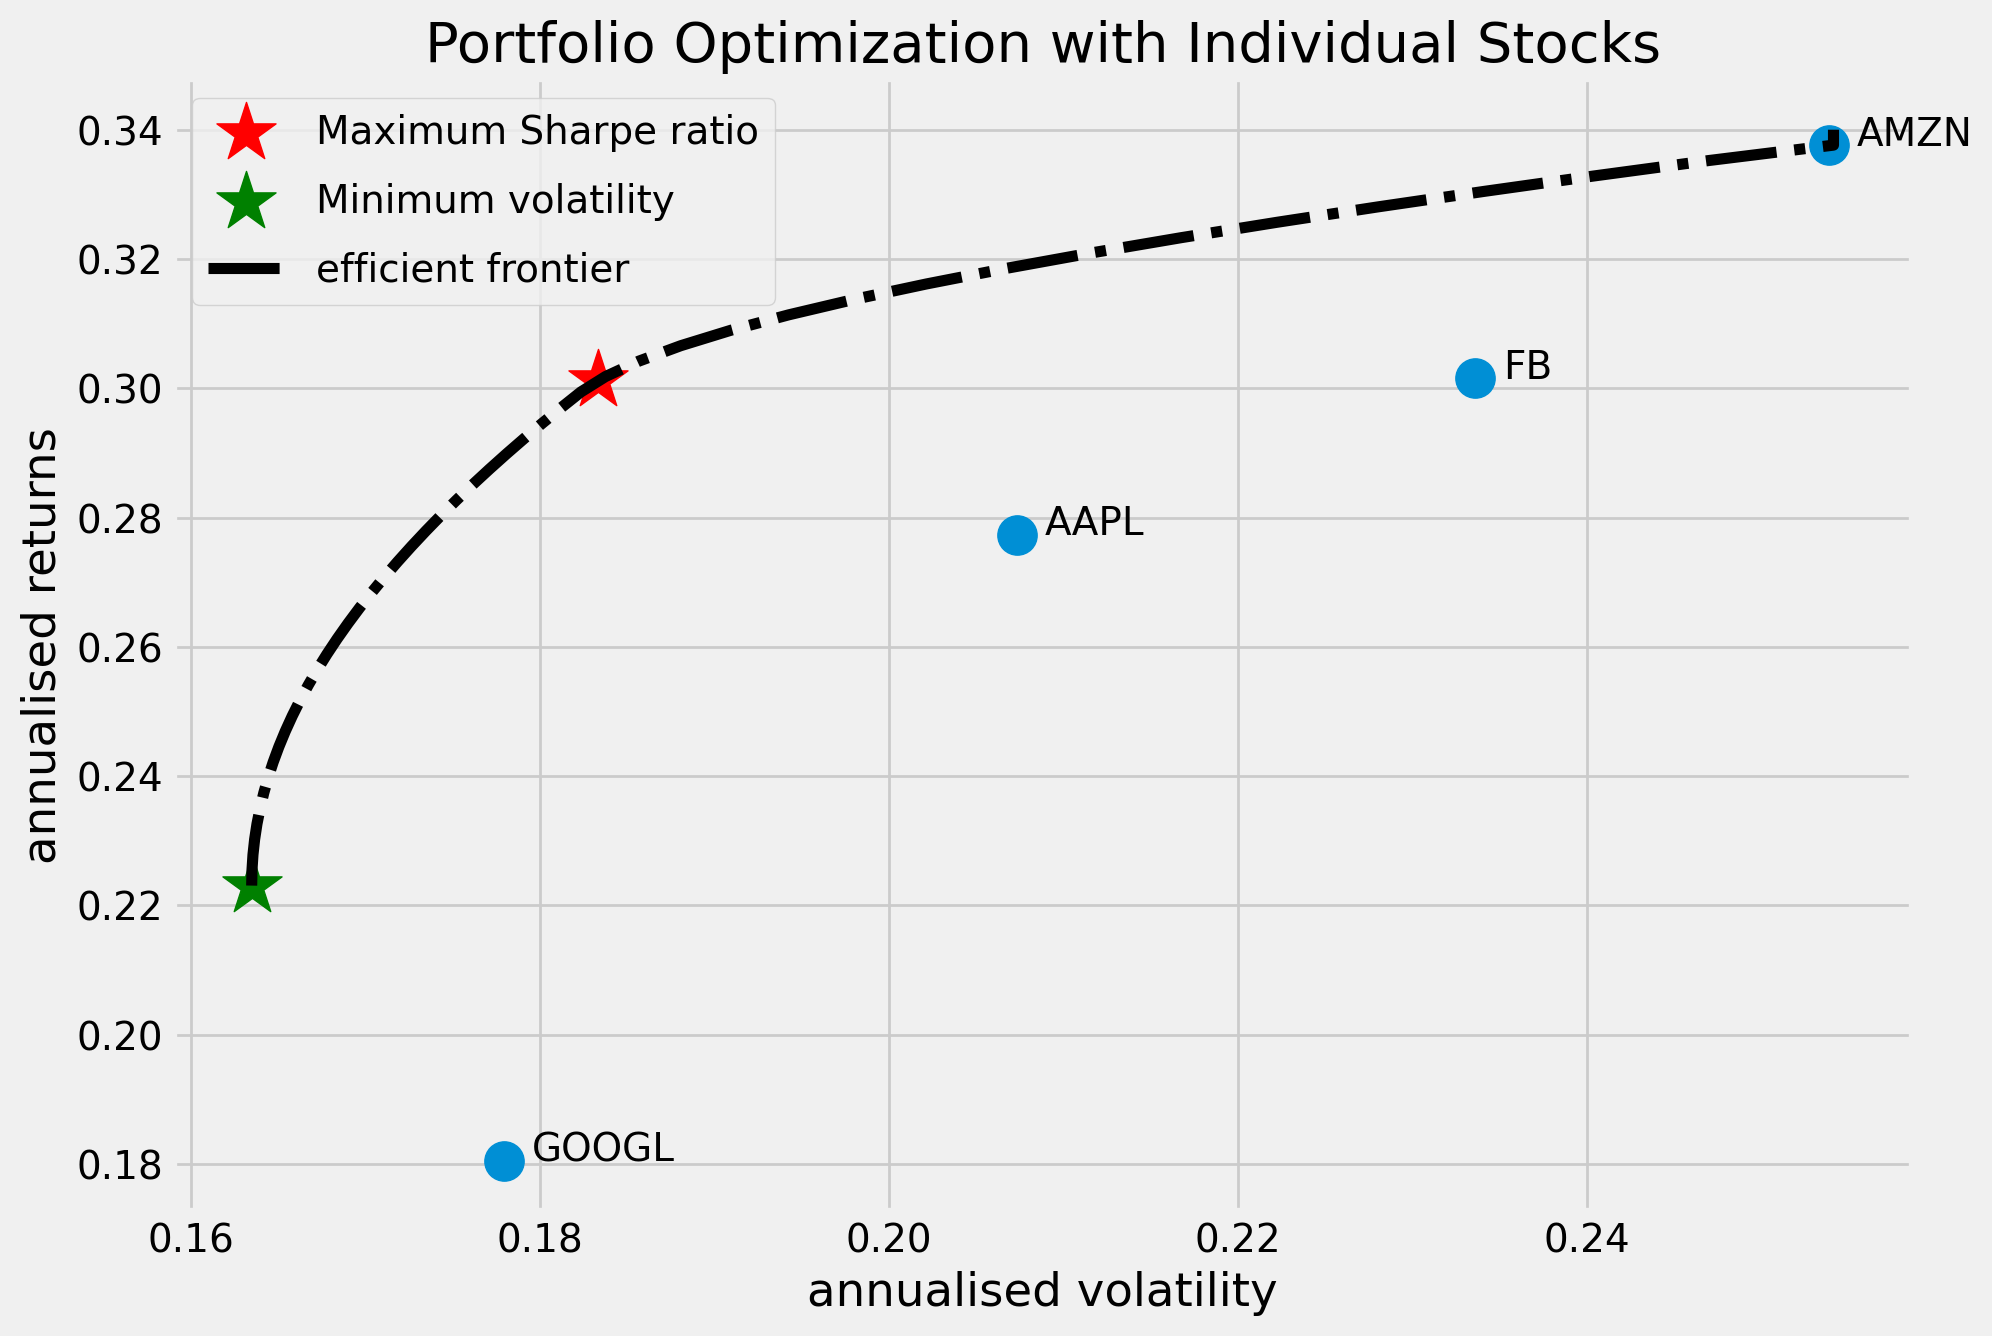

In [28]:


display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)



Comme vous pouvez le voir sur le graphique ci-dessus, le titre présentant le moins de risque est Google, à environ 0,18. Mais avec l'optimisation du portefeuille, nous pouvons atteindre un risque encore plus faible à 0,16, et toujours avec un rendement supérieur à celui de Google. Et si nous sommes prêts à prendre un peu plus de risque, à un niveau de risque similaire à celui de Google, nous pouvons obtenir un rendement beaucoup plus élevé de 0,30 grâce à l'optimisation du portefeuille. 